In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [4]:
df_index = pd.read_csv('index.csv')

In [5]:
df_index.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [6]:
# drop unecessary columns
# inplace=True to modify the dataframe
df_index.drop(columns=['Unnamed: 0','year','month'],axis=1,inplace=True)

In [7]:
df_index.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [8]:
# check null values
df_index.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

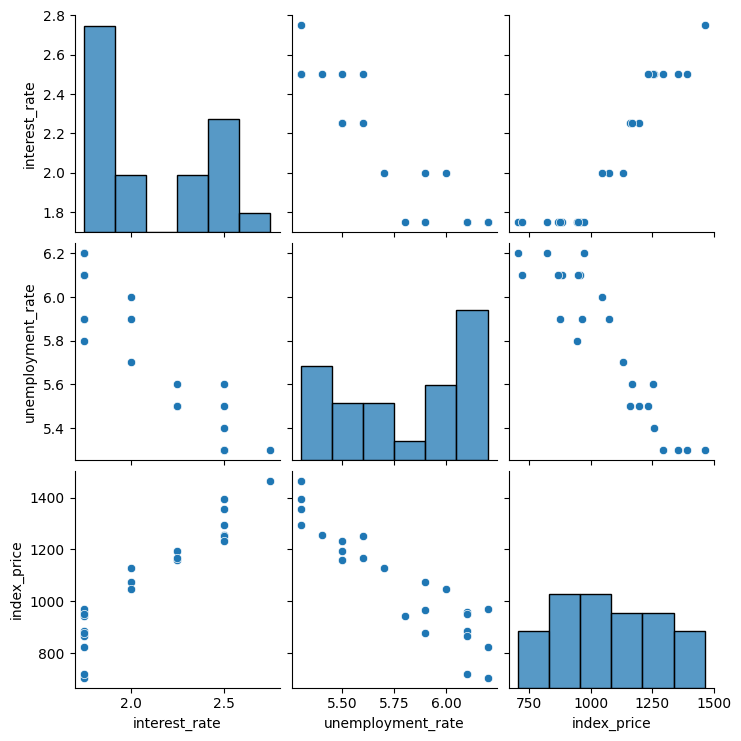

In [9]:
# Visualization
# plot the data
sns.pairplot(df_index)

In [10]:
df_index.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


Text(0, 0.5, 'Unemployment Rate')

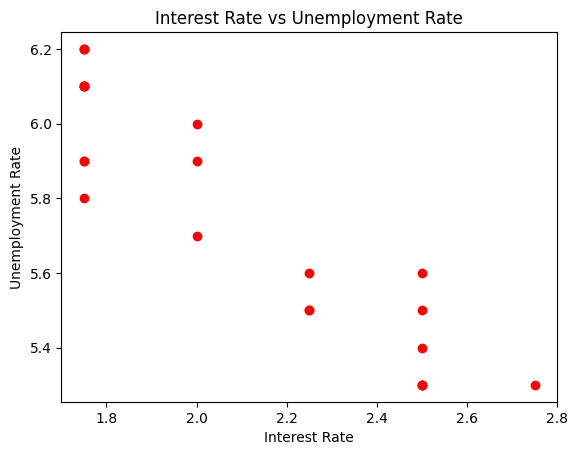

In [11]:
## Visualize the data points more closely 
# scatter :- to plot data points on the horizontal and vertical axis
plt.scatter(df_index['interest_rate'],df_index['unemployment_rate'],color='r')
plt.title('Interest Rate vs Unemployment Rate')
plt.xlabel('Interest Rate')
plt.ylabel('Unemployment Rate')


In [ ]:
## independent and dependent features
# X = df_index[['interest_rate'], ['unemployment_rate']] # independent features
X = df_index.iloc[:,:-1] # independent features
y = df_index.iloc[:,-1] # dependent features

In [13]:
# train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

<Axes: xlabel='interest_rate', ylabel='unemployment_rate'>

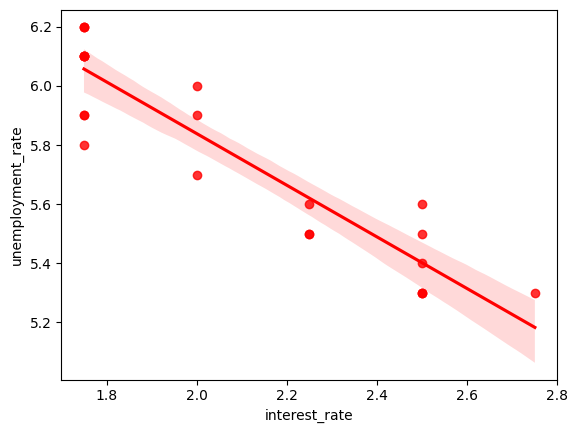

In [17]:
sns.regplot(x='interest_rate', y='unemployment_rate', data=df_index, color='r')


<Axes: xlabel='index_price', ylabel='unemployment_rate'>

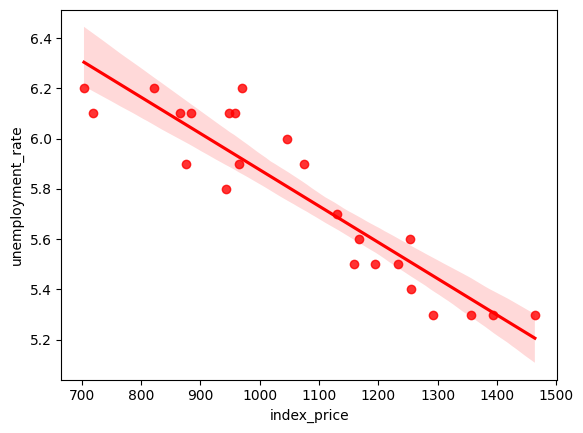

In [19]:
sns.regplot(x='index_price', y='unemployment_rate', data=df_index, color='r')


In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [23]:
# fit_transform :- fit method is calculating the mean and variance of each of the features present in our data
# transform :- Transform method is transforming all the features using the respective mean and variance
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [24]:
X_train

array([[ 0.55339859, -0.53244666],
       [-0.9486833 ,  0.41597395],
       [ 1.30443953, -1.48086727],
       [-0.9486833 ,  1.36439457],
       [ 1.30443953, -0.53244666],
       [ 1.30443953, -1.48086727],
       [-0.19764235,  0.73211416],
       [-0.9486833 ,  1.04825436],
       [ 1.30443953, -1.48086727],
       [ 1.30443953, -1.16472707],
       [-0.9486833 ,  1.36439457],
       [-0.9486833 ,  1.04825436],
       [-0.9486833 ,  0.41597395],
       [-0.9486833 ,  1.04825436],
       [ 0.55339859, -0.84858687],
       [-0.19764235, -0.21630646],
       [-0.9486833 ,  0.09983375],
       [-0.9486833 ,  1.04825436],
       [ 1.30443953, -0.84858687]])

In [25]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()

In [26]:
# fit the model :- The next step is to train the algorithm, for which you would use the .fit() method
regression.fit(X_train,y_train)

LinearRegression()

In [ ]:
# Cross validation
from sklearn.model_selection import cross_val_score
validation_score = cross_val_score(regression,X_train,y_train,scoring='neg_mean_squared_error',cv=3)

In [31]:
validation_score

array([-4304.75412833, -7608.56499271, -5108.77588052])

In [32]:
np.mean(validation_score)

np.float64(-5674.031667186762)

In [33]:
# Prediction
y_pred =regression.predict(X_test)  # predict the values


In [34]:
y_pred

array([1204.14403741,  821.62603274, 1406.38534684,  857.68137178,
        994.85736555])

In [35]:
# Performance Metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
print('Mean Squared Error :',mse)
print('Mean Absolute Error :',mae)
print('Root Mean Squared Error :',rmse)



Mean Squared Error : 6957.105303258833
Mean Absolute Error : 71.71878409976625
Root Mean Squared Error : 83.40926389351985


In [ ]:

from sklearn.metrics import r2_score
r2_score(y_test,y_pred) # R2 value


0.8254940547158576

In [37]:
# Display adjusted r-squared value
n = X_train.shape[0]
p = X_train.shape[1]
adj_r2 = 1-(1-r2_score(y_test,y_pred))*(n-1)/(n-p-1)

In [38]:
print(adj_r2)

0.8036808115553398


In [ ]:
# Assumption of Linear Regression

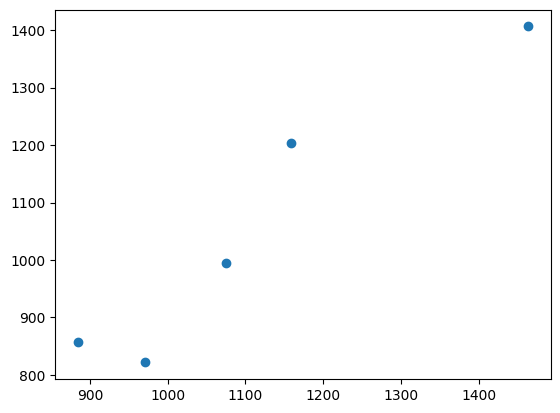

In [39]:
plt.scatter(y_test,y_pred)

C:\Users\vedaa\AppData\Local\Temp\ipykernel_2812\3790187245.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals)


<Axes: xlabel='index_price', ylabel='Density'>

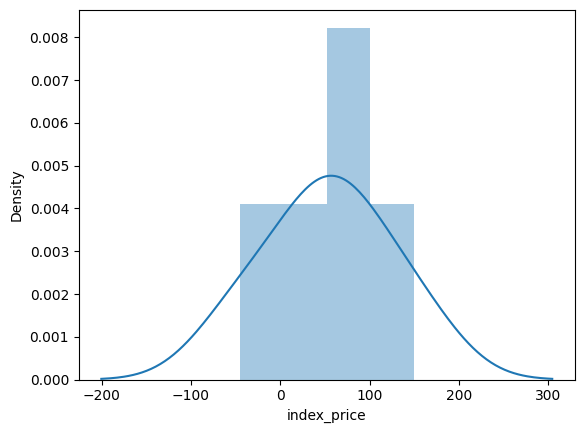

In [42]:
# Residuals :- The difference between the observed value of the dependent variable (y) and the predicted value (ŷ) is called the residual (e). Each data point has one residual.
residuals = y_test-y_pred
sns.distplot(residuals)

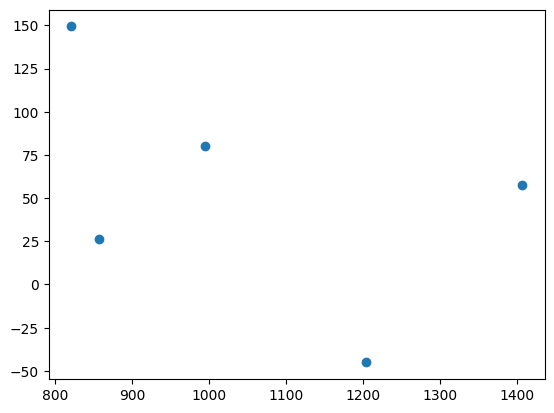

In [43]:
# Scatter plot wrt prediction and residuals
plt.scatter(y_pred,residuals)

In [44]:
# Ols :- Ordinary Least Square
import statsmodels.api as sm


In [45]:
models=sm.OLS(y_train,X_train).fit()

In [46]:
models.summary()

C:\Users\vedaa\AppData\Roaming\Python\Python312\site-packages\scipy\stats\_axis_nan_policy.py:418: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=19 observations were given.
  return hypotest_fun_in(*args, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            index_price   R-squared (uncentered):                   0.033
Model:                            OLS   Adj. R-squared (uncentered):             -0.081
Method:                 Least Squares   F-statistic:                             0.2916
Date:                Mon, 17 Feb 2025   Prob (F-statistic):                       0.751
Time:                        17:54:54   Log-Likelihood:                         -159.34
No. Observations:                  19   AIC:                                      322.7
Df Residuals:                      17   BIC:                                      324.6
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            86.6335    647.232      0.134      0.895   -1278.906    1452.173
x2          -114.0486    647.232     -0.176      0.862   -1479.588    1251.491
==============================================================================
Omnibus:                        0.676   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.713   Jarque-Bera (JB):                0.526
Skew:                          -0.369   Prob(JB):                        0.769
Kurtosis:                       2.656   Cond. No.                         4.82
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [47]:
print(models.summary())


                                 OLS Regression Results                                
Dep. Variable:            index_price   R-squared (uncentered):                   0.033
Model:                            OLS   Adj. R-squared (uncentered):             -0.081
Method:                 Least Squares   F-statistic:                             0.2916
Date:                Mon, 17 Feb 2025   Prob (F-statistic):                       0.751
Time:                        17:55:27   Log-Likelihood:                         -159.34
No. Observations:                  19   AIC:                                      322.7
Df Residuals:                      17   BIC:                                      324.6
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

C:\Users\vedaa\AppData\Roaming\Python\Python312\site-packages\scipy\stats\_axis_nan_policy.py:418: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=19 observations were given.
  return hypotest_fun_in(*args, **kwds)
